In [2]:
import pandas as pd
import numpy as np
from pydataset import data
import matplotlib.pyplot as plt

### 1. Load the mpg dataset. Read the documentation for it, and use the data to answer these questions

In [3]:
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


### 1-1. On average, which manufacturer has the best miles per gallon?

In [4]:
# Calculate the mean of city and highway mileages

avereage_mileages = (mpg.cty + mpg.hwy)/2
avereage_mileages

1      23.5
2      25.0
3      25.5
4      25.5
5      21.0
       ... 
230    23.5
231    25.0
232    21.0
233    22.0
234    21.5
Length: 234, dtype: float64

In [5]:
# Add the average_mileages as a new column

mpg['avereage_mileages'] = avereage_mileages
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avereage_mileages
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0


In [6]:
# Groupby manufacturera and calculate the mean of avereage mileages of all its models

manufacturer_mileages = mpg.groupby('manufacturer').avereage_mileages.mean()
manufacturer_mileages

manufacturer
audi          22.027778
chevrolet     18.447368
dodge         15.540541
ford          16.680000
honda         28.500000
hyundai       22.750000
jeep          15.562500
land rover    14.000000
lincoln       14.166667
mercury       15.625000
nissan        21.346154
pontiac       21.700000
subaru        22.428571
toyota        21.720588
volkswagen    25.074074
Name: avereage_mileages, dtype: float64

In [7]:
# Find out which manufacturer has the best miles per gallon?

manufacturer_mileages.nlargest(n=1,keep='all')

manufacturer
honda    28.5
Name: avereage_mileages, dtype: float64

### 1-2. How many different manufacturers are there?

In [12]:
manufacturer_mileages.size

15

In [11]:
manufacturer_mileages.nunique()

15

In [10]:
mpg.manufacturer.value_counts().size

15

In [14]:
mpg.manufacturer.nunique()

15

In [16]:
mpg_manufacturer = pd.DataFrame(mpg.groupby('manufacturer'))
mpg_manufacturer.shape[0]

15

### 1-3. How many different models are there?

In [17]:
mpg.model.value_counts().size

38

In [18]:
mpg.model.nunique()

38

### 1-4. Do automatic or manual cars have better miles per gallon?

In [19]:
trans_mileages = mpg.groupby('trans').avereage_mileages.mean()
trans_mileages

trans
auto(av)      23.900000
auto(l3)      24.000000
auto(l4)      18.951807
auto(l5)      17.717949
auto(l6)      16.833333
auto(s4)      22.166667
auto(s5)      21.333333
auto(s6)      21.281250
manual(m5)    22.775862
manual(m6)    20.552632
Name: avereage_mileages, dtype: float64

In [20]:
auto_mileages = trans_mileages.loc['auto(av)':'auto(s6)'].mean()
auto_mileages

20.773042410024715

In [21]:
man_mileages = trans_mileages.loc['manual(m5)':'manual(m6)'].mean()
man_mileages

21.664246823956443

### 2. Joining and Merging

Copy the users and roles dataframes from the examples above. What do you think a right join would look like? An outer join? What happens if you drop the foreign keys from the dataframes and try to merge them?

In [22]:
users = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6],
    'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
    'role_id': [1, 2, 3, 3, np.nan, np.nan]
})
users

,id,name,role_id
0,1,bob,1.0
1,2,joe,2.0
2,3,sally,3.0
3,4,adam,3.0
4,5,jane,NaN
5,6,mike,NaN


In [23]:
roles = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['admin', 'author', 'reviewer', 'commenter']
})
roles

,id,name
0,1,admin
1,2,author
2,3,reviewer
3,4,commenter


### users right join roles

In [24]:
pd.merge(users, roles, left_on = 'role_id', right_on = 'id', how = 'right')

,id_x,name_x,role_id,id_y,name_y
0,1.0,bob,1.0,1,admin
1,2.0,joe,2.0,2,author
2,3.0,sally,3.0,3,reviewer
3,4.0,adam,3.0,3,reviewer
4,NaN,NaN,NaN,4,commenter


### users outer join roles

In [25]:
pd.merge(users, roles, left_on = 'role_id', right_on = 'id', how = 'outer')

,id_x,name_x,role_id,id_y,name_y
0,1.0,bob,1.0,1.0,admin
1,2.0,joe,2.0,2.0,author
2,3.0,sally,3.0,3.0,reviewer
3,4.0,adam,3.0,3.0,reviewer
4,5.0,jane,NaN,NaN,NaN
5,6.0,mike,NaN,NaN,NaN
6,NaN,NaN,NaN,4.0,commenter


### If the foreign key, the role_id is dropped, What will the users and roles join on? 

### 3. Getting data from SQL databases

### 1. Create a function named get_db_url. It should accept a username, hostname, password, and database name and return a url formatted like in the examples in this lesson.

In [26]:
from env import host, user, password

url = f'mysql+pymysql://{user}:{password}@{host}'
    
get_db_url = f'mysql+pymysql://{user}:{password}@{host}/employees'

In [ ]:
# Same time when you write it as a csv.

### 2. Use your function to obtain a connection to the employees database.

In [27]:
query = 'show tables'

pd.read_sql(query, get_db_url)

,Tables_in_employees
0,current_dept_emp
1,departments
2,dept_emp
3,dept_emp_latest_date
4,dept_manager
5,employees
6,employees_with_departments
7,salaries
8,titles


### 3. Once you have successfully run a query:
### Intentionally make a typo in the database url. What kind of error message do you see?
Name Error

In [ ]:
# get_db_url_typo = f'mysql+pymysql://{user}:{bassword}@{host}/employees'
    
# query = 'show tables'

# pd.read_sql(query, get_db_url_typo)

### Intentionally make an error in your SQL query. What does the error message look like?

ProgrammingError

In [ ]:
# get_db_url = f'mysql+pymysql://{user}:{password}@{host}/employees'
    
# query_typo = 'show table'

# pd.read_sql(query_typo, url_employees)

### 4. Read the employees and titles tables into two separate dataframes

In [28]:
query = 'select * from employees'
employees = pd.read_sql(query, get_db_url)

employees.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [29]:
query = 'select * from titles'
titles = pd.read_sql(query, get_db_url)

titles.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


### 5. Visualize the number of employees with each title.

In [30]:
employee_number_under_title = titles.groupby('title').emp_no.count()
employee_number_under_title

title
Assistant Engineer     15128
Engineer              115003
Manager                   24
Senior Engineer        97750
Senior Staff           92853
Staff                 107391
Technique Leader       15159
Name: emp_no, dtype: int64

Text(0.5, 0, 'Number of employees')

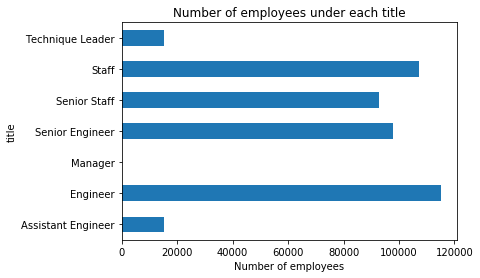

In [31]:
employee_number_under_title.plot(kind = 'barh')
plt.title("Number of employees under each title")
plt.xlabel("Number of employees")

### 6. Join the employees and titles dataframes together.

In [32]:
em_join_ti = pd.merge(employees, titles, left_on = 'emp_no', right_on = 'emp_no', how = 'inner')
em_join_ti.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01


### 7. Visualize how frequently employees change titles.

In [33]:
em_change_ti = em_join_ti.groupby('emp_no').title.count()
em_change_ti

emp_no
10001     1
10002     1
10003     1
10004     2
10005     2
         ..
499995    1
499996    2
499997    2
499998    2
499999    1
Name: title, Length: 300024, dtype: int64

In [34]:
em_change_ti.value_counts(normalize = True)

1    0.532471
2    0.457483
3    0.010046
Name: title, dtype: float64

Text(0.5, 0, 'Number of Titles Empolyees Owned')

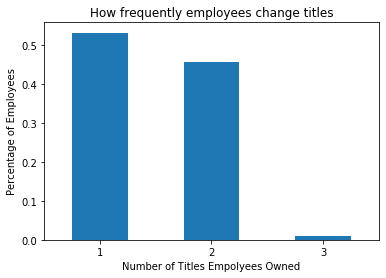

In [35]:
em_change_ti.value_counts(normalize = True).plot.bar()

plt.title("How frequently employees change titles")
plt.xticks(rotation=0)
plt.ylabel("Percentage of Employees")
plt.xlabel("Number of Titles Empolyees Owned")

### 8. For each title, find the hire date of the employee that was hired most recently with that title.

In [36]:
em_join_ti.groupby('title').hire_date.max()

title
Assistant Engineer    1999-12-24
Engineer              2000-01-28
Manager               1992-02-05
Senior Engineer       2000-01-01
Senior Staff          2000-01-13
Staff                 2000-01-12
Technique Leader      1999-12-31
Name: hire_date, dtype: object

### 9. Write the code necessary to create a cross tabulation of the number of titles by department. (Hint: this will involve a combination of SQL and python/pandas code)

In [37]:
query = """select dept_name, title from departments join dept_emp using(dept_no) join titles using(emp_no)"""

dep_title = pd.read_sql(query, get_db_url)
dep_title.head()

,dept_name,title
0,Customer Service,Staff
1,Customer Service,Senior Staff
2,Customer Service,Staff
3,Customer Service,Senior Staff
4,Customer Service,Staff


In [38]:
pd.crosstab(dep_title.dept_name, dep_title.title)

title,Assistant Engineer,Engineer,Manager,Senior Engineer,Senior Staff,Staff,Technique Leader
dept_name,,,,,,,
Customer Service,298,2362,4,2027,13925,16150,309
Development,7769,58135,2,49326,1247,1424,7683
Finance,0,0,2,0,12139,13929,0
Human Resources,0,0,2,0,12274,14342,0
Marketing,0,0,2,0,13940,16196,0
Production,6445,49649,4,42205,1270,1478,6557
Quality Management,1831,13852,4,11864,0,0,1795
Research,378,2986,2,2570,11637,13495,393
Sales,0,0,2,0,36191,41808,0


### 4. Use your get_db_url function to help you explore the data from the chipotle database. Use the data to answer the following questions

In [39]:
query = 'show tables'

url_chipotle = f'mysql+pymysql://{user}:{password}@{host}/chipotle'
    
pd.read_sql(query, url_chipotle)

,Tables_in_chipotle
0,orders


In [40]:
query = 'select * from orders'
orders = pd.read_sql(query, url_chipotle)

orders.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


### 4-1. What is the total price for each order?

In [41]:
orders['item_price'] = orders.item_price.apply(lambda i: float(i[1:-1]))
orders.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,2.39
1,2,1,1,Izze,[Clementine],3.39
2,3,1,1,Nantucket Nectar,[Apple],3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",16.98


In [42]:
orders['item_total_price'] = orders.quantity * orders.item_price
orders.head()

,id,order_id,quantity,item_name,choice_description,item_price,item_total_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,2.39,2.39
1,2,1,1,Izze,[Clementine],3.39,3.39
2,3,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,2.39,2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",16.98,33.96


In [43]:
orders.groupby('order_id').item_total_price.sum()

order_id
1       11.56
2       33.96
3       12.67
4       21.00
5       13.70
        ...  
1830    23.00
1831    12.90
1832    13.20
1833    23.50
1834    28.75
Name: item_total_price, Length: 1834, dtype: float64

### 4-2. What are the most popular 3 items?

In [48]:
orders.groupby('item_name').quantity.sum().nlargest(n=3,keep='all')

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Name: quantity, dtype: int64

### 4-3. Which item has produced the most revenue?

In [49]:
orders.groupby('item_name').item_total_price.sum().nlargest(n=1,keep='all')

item_name
Chicken Bowl    8044.63
Name: item_total_price, dtype: float64